<a href="https://colab.research.google.com/github/diegofescg/TalentoTech/blob/main/TallerGeoJson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: >

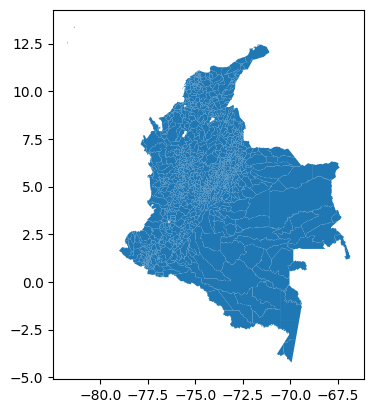

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, box
import requests

# URL pública de Google Drive para compartir
google_drive_url = "https://drive.google.com/uc?id=1rge0WctTRXHAkkdoniWlZWBzoH8v0IYn"

# Descargar el archivo
response = requests.get(google_drive_url)
with open("municipios.geojson", "wb") as f:
    f.write(response.content)

# Ruta al archivo descargado localmente
ruta_municipios = "municipios.geojson"

# Leer el archivo con GeoPandas
shapes = gpd.read_file(ruta_municipios)

# Visualizar
shapes.plot()

In [ ]:
print(shapes.columns)

Index(['OBJECTID_1', 'DPTO_CCDGO', 'MPIO_CCDGO', 'Shape_Leng', 'OBJECTID',
       'MPIO_CNMBR', 'DESCRPCION', 'DEPTO', 'P_ENERSI', 'P_ENERNO',
       'P_ALCANSI', 'P_ALCANNO', 'P_ACUESI', 'P_ACUENO', 'P_GASNSI',
       'P_GASNNO', 'P_GASNNOIN', 'P_TELEFSI', 'P_TELEFNO', 'P_TELEFNOI',
       'ShapeSTArea', 'ShapeSTLength', 'geometry'],
      dtype='object')


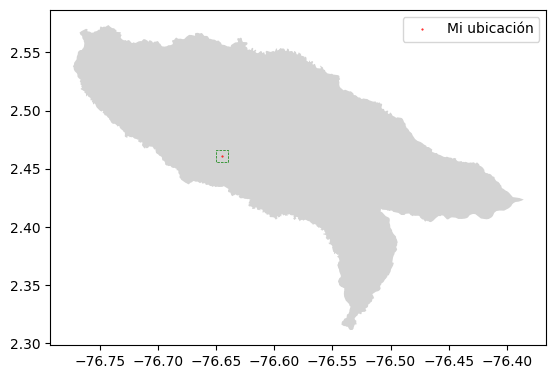

In [ ]:
# Filtrando a Popayán
popayan = shapes[shapes['MPIO_CNMBR'] == 'POPAYAN']

# Coordenadas de mi casa
latitud_casa, longitud_casa = 2.461184394876284, -76.64511464861079

# Crear un punto con las coordenadas de la casa
punto_casa = Point(longitud_casa, latitud_casa)

# Crear un cuadro alrededor del punto
#caja = [(-76.65, 2.45), (-76.65, 2.46), (2.46, -76.66), (-76.65, 2.46)]

#Creando las figuras
#cuadro = Polygon(caja)

# Definir el tamaño del cuadro alrededor del punto (en grados)
tamaño_cuadro = 0.005  # Puedes ajustar este valor según sea necesario

# Crear un cuadro alrededor del punto
cuadro = box(longitud_casa - tamaño_cuadro, latitud_casa - tamaño_cuadro,
             longitud_casa + tamaño_cuadro, latitud_casa + tamaño_cuadro)

# Crear el gráfico
fig, ax = plt.subplots()

# Trazar la zona de Popayán
popayan.plot(ax=ax, color='lightgrey')
#x, y = cuadro.exterior.xy
#ax.plot(x, y, color='black', alpha=0.5)

# Trazar el punto de la casa
ax.plot(longitud_casa, latitud_casa, 'ro', markersize=0.5, label='Mi ubicación')

# Trazar el cuadro alrededor del punto
x, y = cuadro.exterior.xy
ax.plot(x, y, color='green', linestyle='--', linewidth=0.5)

# Configurar el título y las etiquetas de los ejes
#ax.set_title('Mapa con Punto Específico en Popayán')
#ax.set_xlabel('Longitud')
#ax.set_ylabel('Latitud')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()